In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PolynominalHelp  import knn

Import all the needed labaries and external files.

Numpy for the matrixes.

External added functions from PolynominalHelp which is used for the regression.

In [2]:
polynomials = np.asarray(np.genfromtxt('polynomial200.csv', delimiter=',')) # Read the polynomial200.csv file.
kValues = [1,3,5,7,9,11]  # Decision boundary with corresponding training error for k

#Divide the dataset into a training set of size 100, and test set of size 100.
trainingSet = np.array(polynomials[:100,:])
testSet = np.array(polynomials[100:,:])

The needed datas are set here. 
The polynomial200.csv file is read using np.genfromtx.
The hyperparameter K is set here and will be vary between [1,3,5,7,9,11].
The data from polynomial200.csv is spread up to training set and testing set.

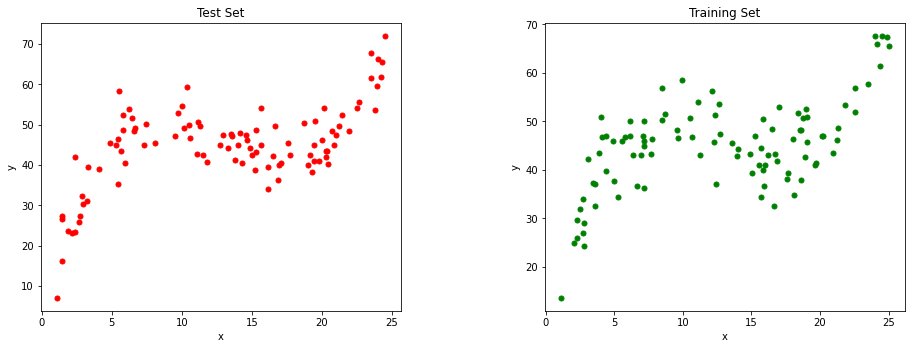

In [3]:

plt.figure(figsize=(15, 5))
# Plot test set figure.
plt.subplot(121)    # Plot as subplot on column 1.
plt.title(("Test Set"))      # Title of plot.
plt.xlabel("x")          # Set x label.
plt.ylabel("y")             # Set y label.
plt.plot(testSet[:, 0], testSet[:, 1], 'ro', markersize=5)      # Plot test set data.


# Plot training set figure.
plt.subplot(122)    # Plot as subplot on column 1.
plt.title("Training Set")     # Title of plot.
plt.xlabel("x")          # Set x label.
plt.ylabel("y")          # Set y label.
plt.plot(trainingSet[:, 0], trainingSet[:, 1], 'go', markersize=5)  # Plot traning set data.

# Plot adjustments.
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9,  wspace=0.4,  hspace=0.4) # Margin between sub plots.
plt.show()  # End subplot.

MSE test error for, k = 1, MSE = 0.0
MSE test error for, k = 3, MSE = 17.59
MSE test error for, k = 5, MSE = 21.44
MSE test error for, k = 7, MSE = 23.2
MSE test error for, k = 9, MSE = 23.19
MSE test error for, k = 11, MSE = 25.76


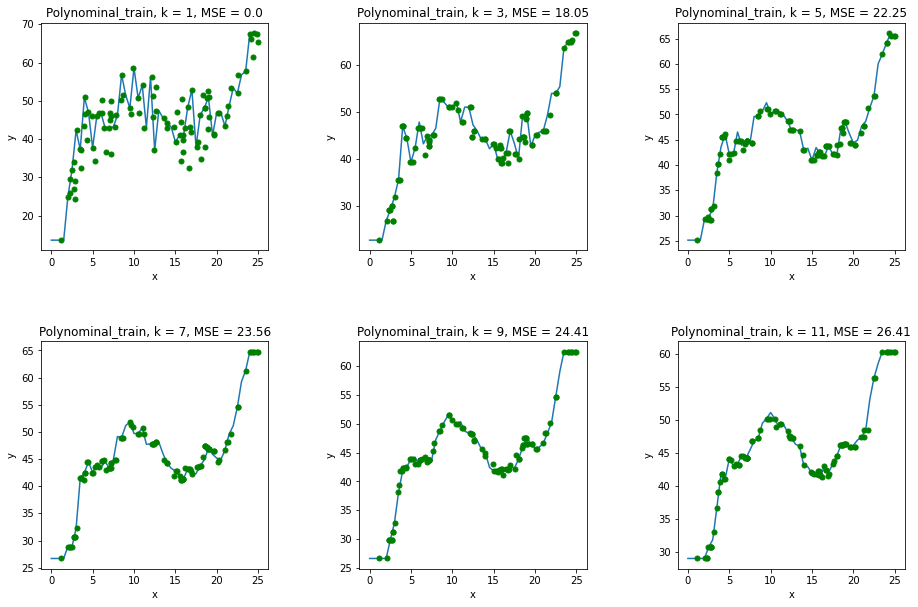

In [4]:

# Plot Knn regression.
figurNumber = 1   # Subplot number.
plt.figure(figsize=(15, 15))        # Size of window holding the  subplots.
for k in kValues:
    plt.subplot(3, 3, figurNumber)  # Set current subplot.

    xyValues = []   # List holding x and y values for "graph".
    intervall =  np.arange(0, 25, 0.50) # Create intervall from 0 to 25. Jump 0.50 steps on each.
    for x in intervall:
        y = knn(trainingSet, x, k)  # Get means of k-nearest neigbors.
        xyValues.append([x, y])     # Load the mean as y and cur    rent x in intervall as  x.
    regression = np.asarray(xyValues)   # Save the regression line f(x). x,y.
    plt.plot(regression[:, 0], regression[:, 1])    # Plot regression line.

    resultTrain = []         # List holding the training data result.
    for x in range( len(trainingSet) ):
        resultY = knn(trainingSet,trainingSet[x][0], k) # Get the mean of current f(x) with nearset neighbors.
        resultTrain.append([trainingSet[x][0], resultY])    # Save result to array with corresponding x.
        plt.plot(trainingSet[x][0], resultY, 'go-', markersize=5)   # Draw point on subplot.
    resultTrain = np.asarray(resultTrain)       # Save x,y valus as np.


    resultTest = []  # List holding the test data result.
    for x in range( len(testSet) ): 
        resultY = knn(testSet,testSet[x][0], k) # Get the mean of current f(x) with nearset neighbors.
        resultTest.append([testSet[x][0], resultY]) # Save result to array with corresponding x.
    resultTest = np.asarray(resultTest)  # Save x,y valus as np.
    
    mseTraining = round( np.mean((resultTrain[:, 1]-trainingSet[:, 1])**2), 2)  # Training Error. Read the MSE of the training data result. Round with two decimals.
    plt.title("Polynominal_train, k = " +str(k) +", MSE = " +str(mseTraining))     # Title of plot.
    plt.xlabel("x") # Name for x label.
    plt.ylabel("y") # Name for y label.

    # MSE test data.
    mseTtest = round( np.mean((resultTest[:, 1]-testSet[:, 1])**2), 2)     #  Test error. Compute and present the MSE test error for k = 1, 3, 5, 7, 9, 11. Round with two decimlas.
    print("MSE test error for, k = " +str(k) +", MSE = " +str(mseTtest))    # Count the test set MSE value.
    figurNumber += 1    # Increase current subplot number.

plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9,  wspace=0.4,  hspace=0.4) # Margin between sub plots.
plt.show()  # End subplot.

K = 1 should not be used because it has a very high variance and high bias.\
**K = 3 gives a good Fit/Robust. Which is the best for this type of data.\
K = 3 has a good MSE between training and test set, which tells us that the variance is good.\
The bias is also not too low or too high judging by the drawn graph.**\
K = 5,7,9,11 has too low bias, though the variance(MSE) may be good for this data.